<a href="https://colab.research.google.com/github/Neethuharii/Foundatin-of-ML/blob/main/fundamentals%20of%20machine%20learning/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [8]:
data = pd.read_csv('/content/student_mat.csv', sep=";")

In [9]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Trimming Our Data

In [10]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

####Separating Our Data

use numpy to create two arrays. One that contains all of our features and one that contains our labels.

In [11]:
predict = "G3"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels

<ipython-input-11-0dd2bb142e91>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop([predict], 1)) # Features


After this we need to split our data into testing and training data. We will use 90% of our data to train and the other 10% to test

In [12]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

####Implememntation of Algorithm


linear regression works we can use it to predict students final grades.

In [13]:
linear = linear_model.LinearRegression()

we will train and score our model using the arrays

In [14]:
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test) # acc stands for accuracy

In [15]:
acc

0.8647710487320621

####Viewing The Constants

In [16]:
print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

Coefficient: 
 [ 0.14945135  0.97352822 -0.20812887 -0.31039524  0.04231484]
Intercept: 
 -1.3364278261436748


Predicting on Specific Students

In [17]:
predictions = linear.predict(x_test) # Gets a list of all predictions

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

11.029382209875404 [13 11  3  0  8] 11
13.9301588299889 [14 14  3  0  4] 14
15.661162317280231 [16 15  1  0  5] 16
14.376847457416961 [13 15  4  0  0] 15
6.25762272899131 [8 7 2 0 0] 8
9.245441011606852 [11  9  2  0 14] 9
7.231150944569212 [8 8 2 0 0] 0
11.224353117157635 [11 12  3  1  4] 11
10.151735591302916 [ 8 11  2  0  0] 11
16.29961713564969 [16 16  2  0  2] 16
12.846048759604109 [13 13  2  0  0] 12
13.054177626275585 [13 13  1  0  0] 12
16.251158150975336 [14 16  1  0  3] 16
12.073061962881468 [13 11  3  1 40] 11
9.477110070583171 [10 10  2  0  0] 10
14.027705841853487 [13 14  1  0  0] 14
-1.7284856738344445 [5 0 1 3 0] 0
11.324312104499622 [12 11  1  1 16] 12
14.287739044089454 [15 14  2  0  4] 14
15.707955887095418 [14 16  3  0  0] 16
11.349126306766502 [12 12  4  0  1] 12
12.637919892932635 [13 13  3  0  0] 14
13.871481310746502 [15 14  4  0  4] 14
9.58769192539006 [11 10  3  0  4] 10
11.63470734388785 [12 11  1  0 16] 11
11.918280738428663 [13 12  3  0  6] 12
14.877734877784

####Saving Our Model

To save our model we will write to a new file using pickle.dump().

In [18]:
with open("studentgrades.pickle", "wb") as f:       #wb means binary write
    pickle.dump(linear, f)

####Loading Our Model

In [19]:
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

##Training Multiple Models
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))
    
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)


## Plotting Our Data

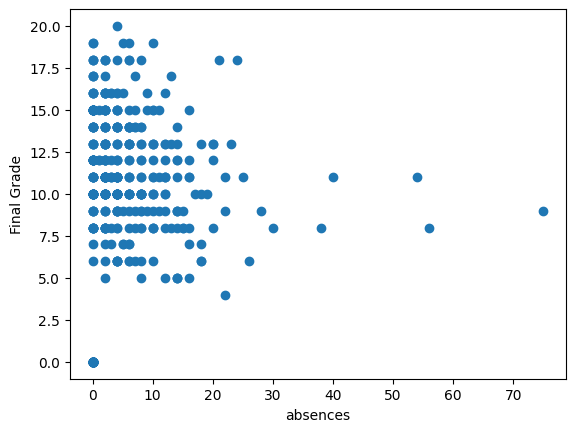

In [23]:
# Drawing and plotting model
plot = "absences" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"])
#plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()